<a href="https://colab.research.google.com/github/vincent-ondeng-aims/python-programming_group_assignment/blob/main/python_group18_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE PROBLEM**

The problem is to designed for AIMS-Senegal a student registration system to streamline the registration process for students. This Python program automates the creation of unique student registration numbers based on specific criteria.

The registration number is generated using the following mechanism:

Identification Fields:
The first three consonants of the student's last name are extracted to form the first part of the registration number. The first three letters of the student's first name form the second part. If either name has fewer than three letters, the program replaces missing letters with "X".

Unique identifier
To ensure uniqueness, a third field consisting of a three-digit number is appended to the registration number. This number represents the order of registration, allowing for differentiation between students with similar names. For example, if two students named Gnansounou Marcel and Gnonas Marcellin register, their identifiers will be GNNMAR001 and GNNMAR002, respectively.

# **THE SOLUTION**

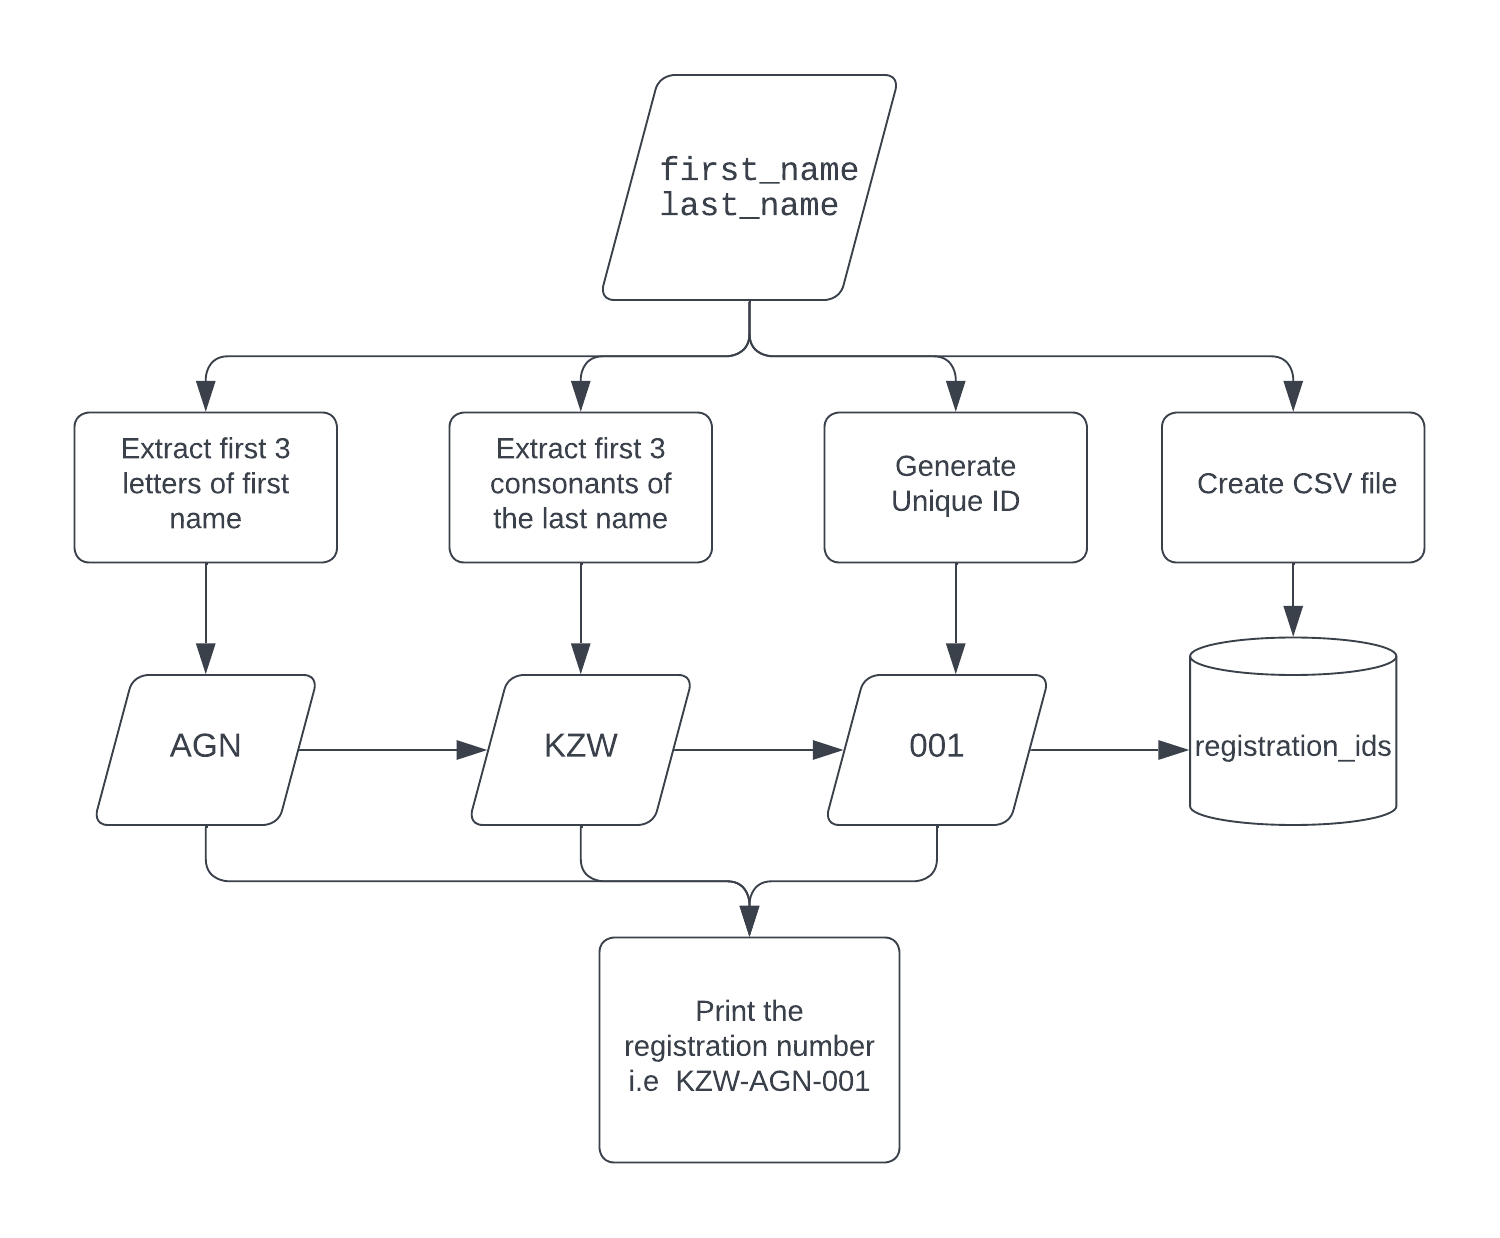

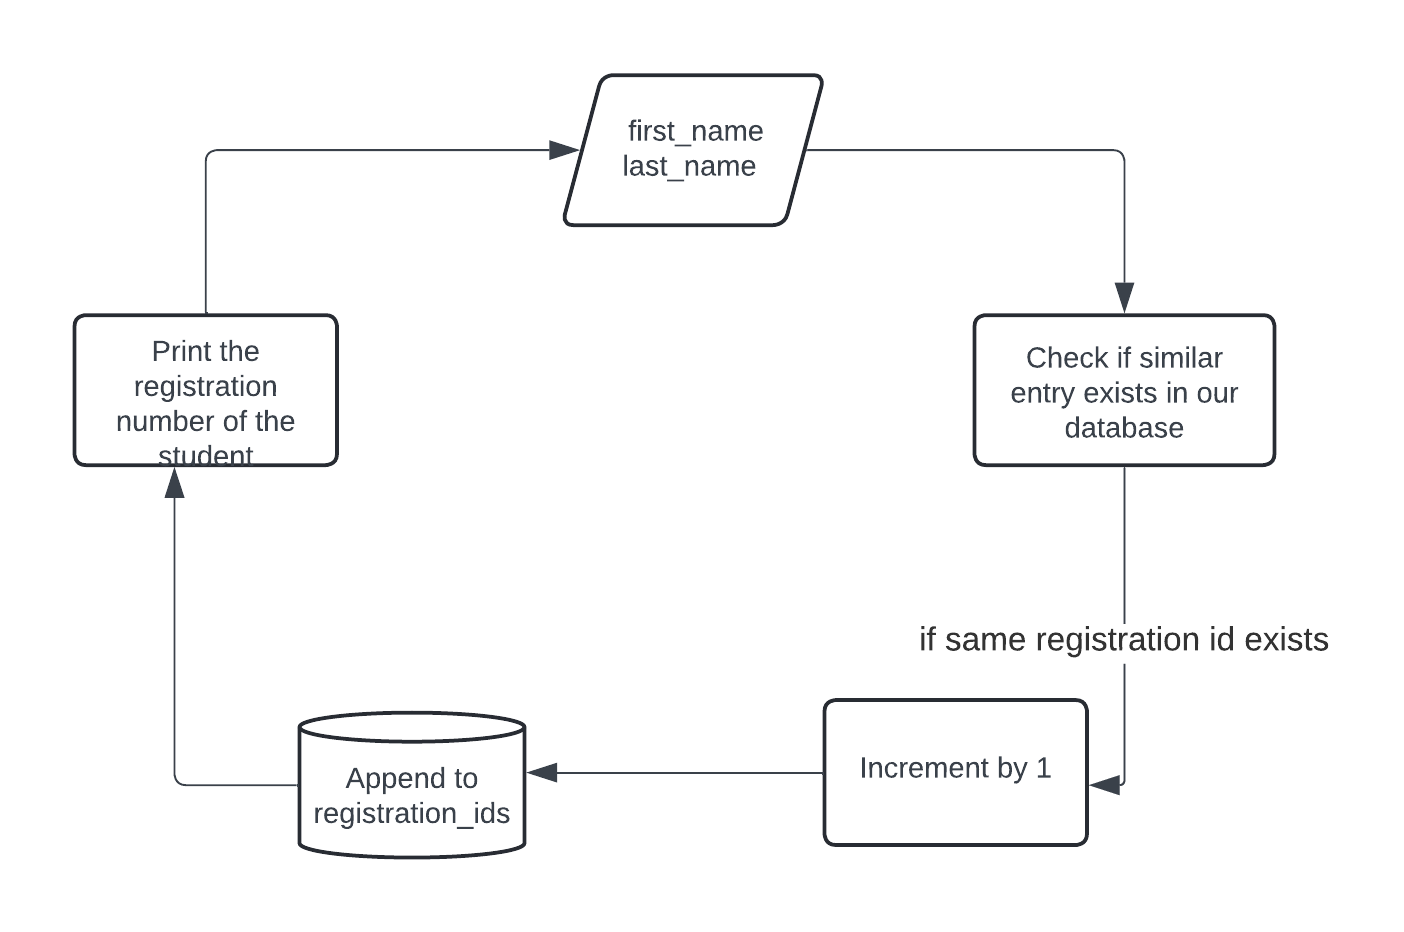

In [1]:
import csv
import os

In [2]:
def conson(X):
  """
  This function takes a String (X) representing the last name, and returns first 3 consonants.

  Arguments: (X) - last name of the student
  Creates temporary variable x to store the consonants
  If the length of x is less than 3, it pads the string with 'X' characters to make it 3 characters long.

  Return: ID1- the first 3 consonants of the last name
  """
  #taking the first three consonants of the last name
  vowels = ["a","e","i","o","u", "A","E","I","O","U"]
  ID1=""
  x=""
  for i in range(len(X)):
      if X[i] not in vowels:
            x=x+X[i]
  if len(x)<3:
        x1=3-len(x)
        x=x+"X"*x1
        ID1=ID1+x
  else:
        ID1=ID1+x[:3]
  return ID1

In [3]:
def three_letter(Y):
  """
  This function extracts the first 3 letters of the first name

  Arguments: Y representing the last name
  Creates temporary variable Y1 to store the first 3 letters of the first name
  if Y is less than 3 charachetrs it pads the string with 'X' characters to make it 3 characters long.

  Return: Y1, first 3 characters of the name (if less than 3 padded with X)

  """
    #taking the first three letters of the first name
  Y1=""
  if len(Y)<3:
       x2=3-len(Y)
       Y1=Y+"X"*x2
  else:
       Y1=Y[:3]
  return Y1

In [4]:
  def verify_list(csv_file, X):
    """
    This function fetches IDs from a CSV file and stores them in a set.
    It then checks if the input ID X, exists, if it exists the function it increments by 1

    Arguments: csv_file, an ID string X as input

    Return: existing IDs_set, updated X string

    """
    # A function to verify whether an element X is in the CSV file
    existing_ids = set()
    if os.path.exists(csv_file):        # Checks if the csv file exists otherwise it skips this block
        with open(csv_file, mode='r', newline='') as file:     # Open the CSV file in 'r' mode
            reader = csv.reader(file)               #  Function parses the file into rows based on the delimiter (usually a comma in CSV files)
            for row in reader:                      # Iterates through each row in the Csv file
                existing_ids.add(row[0])  # Adds the first value of the row to our empty set (exixting_ids)

    # Check if the ID exists and increment if needed
    while X in existing_ids:
        if (int(X[-1]) + 1) < 10 and int(X[-2]) == 0:
            x33 = "00" + str(int(X[-1]) + 1)
        elif 10 <= (int(X[-2:])+1) <= 99 and int(X[-3]) == 0:
            x33 = "0" + str(int(X[-2:]) + 1)
        elif int(X[-3:]) >= 100 and int(X[8:]) < 1000:
            x33 = str(int(X[-3:]) + 1)
        X = X.replace(X[8:], x33)
        X = X.upper()

    return existing_ids, X

In [ ]:
  def ID_creation():
    """
  This is the main function that executes the ID generation process.

  It prompts the user to enter their first and last names, calls the other
  three functions to ensure that the generated ID is unique

  If the ID is unique it writes the ID, first name and last name to the csv file.
    """
    csv_file = 'registration_ids.csv'  # Path to the CSV file
    while True:
        answe = input("If you want to generate an ID, enter 'YES' and if you want to quit, enter 'NO': ")
        if answe == "NO":
            break
        ID = ""
        first_name = input("Enter your first name: ")
        last_name = input("Enter your last name: ")
        X1 = conson(last_name)
        X2 = three_letter(first_name)
        ID = ID + X1 + "-" + X2 + "-" + "001"
        ID = ID.upper()

        # Verify and generate a unique ID
        existing_ids, unique_ID = verify_list(csv_file, ID)

        # Write the unique ID and names to the CSV file
        with open(csv_file, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([unique_ID, first_name, last_name])  # Write ID, first name, last name

        print(unique_ID)

# Run the ID creation function
  ID_creation()

## **Group Members**


1.   AGNES IKUZWE
2.   DENYSE AKAYEZU
3.   NSANI HANDSON NDIM
4.   VINCENT ONDENG
